In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import json
from helpers import *
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
speakers = pd.read_parquet('data/speaker_attributes.parquet')

In [3]:
speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion
0,"[Washington, President Washington, G. Washingt...",[+1732-02-22T00:00:00Z],"[Q161885, Q30]",[Q6581097],1395141751,None,W000178,"[Q82955, Q189290, Q131512, Q1734662, Q294126, ...",[Q327591],None,Q23,George Washington,"[Q698073, Q697949]",item,[Q682443]
1,"[Douglas Noel Adams, Douglas Noël Adams, Dougl...",[+1952-03-11T00:00:00Z],[Q145],[Q6581097],1395737157,[Q7994501],None,"[Q214917, Q28389, Q6625963, Q4853732, Q1884422...",None,None,Q42,Douglas Adams,None,item,None
2,"[Paul Marie Ghislain Otlet, Paul Marie Otlet]",[+1868-08-23T00:00:00Z],[Q31],[Q6581097],1380367296,None,None,"[Q36180, Q40348, Q182436, Q1265807, Q205375, Q...",None,None,Q1868,Paul Otlet,None,item,None
3,"[George Walker Bush, Bush Jr., Dubya, GWB, Bus...",[+1946-07-06T00:00:00Z],[Q30],[Q6581097],1395142029,None,None,"[Q82955, Q15982858, Q18814623, Q1028181, Q1408...",[Q29468],None,Q207,George W. Bush,"[Q327959, Q464075, Q3586276, Q4450587]",item,"[Q329646, Q682443, Q33203]"
4,"[Velázquez, Diego Rodríguez de Silva y Velázqu...",[+1599-06-06T00:00:00Z],[Q29],[Q6581097],1391704596,None,None,[Q1028181],None,None,Q297,Diego Velázquez,None,item,None


In [4]:
CEO_QID = 'Q6581097'
ENTREPRENEUR_QID = 'Q131524'
ARTIST_QID = 'Q483501'
ceo_speakers = speakers[speakers.occupation.apply(lambda g: CEO_QID in g if g is not None else False)]
artist_speakers = speakers[speakers.occupation.apply(lambda g: ARTIST_QID in g if g is not None else False)]
entrepreneur_speakers = speakers[speakers.occupation.apply(lambda g: ENTREPRENEUR_QID in g if g is not None else False)]

In [5]:
# extracting count of significant quotes for all the speakers in quotebank
with open('data/signi-quote-count-combined_1636253317430.json') as f:
    signi_quote_count_dict = json.load(f)

In [6]:
len(signi_quote_count_dict)

624492

In [7]:
signi_quote_count_df = pd.Series(signi_quote_count_dict, name='signi_quote_count')

In [8]:
signi_entrepreneur_speakers = entrepreneur_speakers.merge(signi_quote_count_df, left_on='id', right_index=True, how='inner')
signi_entrepreneur_speakers = signi_entrepreneur_speakers.sort_values(by=['signi_quote_count'], ascending=False).iloc[:100]

In [9]:
signi_entrepreneur_speakers.head()

,aliases,date_of_birth,nationality,gender,lastrevid,ethnic_group,US_congress_bio_ID,occupation,party,academic_degree,id,label,candidacy,type,religion,signi_quote_count
2267061,"[Donald John Trump, Donald J. Trump, Trump, Th...",[+1946-06-14T00:00:00Z],[Q30],[Q6581097],1395141850,None,None,"[Q911554, Q557880, Q3427922, Q15980158, Q13152...","[Q29468, Q1897793, Q29552, Q29468, Q29468]",[Q787674],Q22686,Donald Trump,"[Q699872, Q22923830, Q38051523]",item,[Q178169],201293
7938171,"[Elon Reeve Musk, Elon R. Musk, Elon R Musk]",[+1971-06-28T00:00:00Z],"[Q258, Q16, Q30]",[Q6581097],1395054202,None,None,"[Q15895020, Q205375, Q5482740, Q81096, Q131524...",None,None,Q317521,Elon Musk,None,item,[Q288928],21644
4560262,[Malcolm Bligh Turnbull],[+1954-10-24T00:00:00Z],[Q408],[Q6581097],1388042865,None,None,"[Q1930187, Q82955, Q131524, Q40348, Q2883465]",[Q241149],None,Q927550,Malcolm Turnbull,None,item,[Q1841],17720
4529756,"[Mark Elliott Zuckerberg, Zuck, Zuckerberg, Ma...",[+1984-05-14T00:00:00Z],[Q30],[Q6581097],1391311625,[Q7325],None,"[Q5482740, Q131524, Q82594, Q15472169, Q484876]",None,None,Q36215,Mark Zuckerberg,None,item,"[Q7066, Q9268]",16025
1142938,"[Kim Kardashian West, KiKi, Keeks, Kim K, Kimb...",[+1980-10-21T00:00:00Z],[Q30],[Q6581072],1395690668,"[Q2325516, Q1058496, Q1344183, Q1075293, Q3476...",None,"[Q3501317, Q512314, Q4610556, Q8246794, Q13152...",[Q29552],None,Q186304,Kim Kardashian,None,item,[Q5043],10875


In [10]:
len(signi_entrepreneur_speakers.id.to_list())

100

In [39]:
# retrieves the quotes for the significant top hundred speakers
from functools import partial
years = [2015, 2016, 2017, 2018, 2019, 2020]
speaker_qids = signi_entrepreneur_speakers.id.to_list()
output_list = []

for year in years:
    path_to_input = PATTERN_INPUT.format(year)
    
    # Process quote file
    output_name = process_compressed_json_file(path_to_input, 'data/entrepreneur-speaker-quotes', year, partial(check_if_speaker_quote, speakers=speaker_qids))
    
    output_list.append(output_name)

print('\n\nOutput file names:')
for file_name in output_list:
    print(file_name)

Processing year 2019: 3397it [17:09,  3.30it/s]



File data/quotebank/quotes-2019.json.bz2 processed in 1029.7s



Processing year 2020: 793it [04:01,  3.28it/s]


File data/quotebank/quotes-2020.json.bz2 processed in 241.6s



Output file names:
data/entrepreneur-speaker-quotes-2019_1639068384882.json
data/entrepreneur-speaker-quotes-2020_1639068626708.json


In [11]:
output_list = ['data/entrepreneur-speaker-quotes-2015_1639058393619.json', 'data/entrepreneur-speaker-quotes-2016_1639059086240.json', 'data/entrepreneur-speaker-quotes-2017_1639060611970.json', 'data/entrepreneur-speaker-quotes-2018_1639061980207.json', 'data/entrepreneur-speaker-quotes-2019_1639068384882.json', 'data/entrepreneur-speaker-quotes-2020_1639068626708.json']
print(output_list)

['data/entrepreneur-speaker-quotes-2015_1639058393619.json', 'data/entrepreneur-speaker-quotes-2016_1639059086240.json', 'data/entrepreneur-speaker-quotes-2017_1639060611970.json', 'data/entrepreneur-speaker-quotes-2018_1639061980207.json', 'data/entrepreneur-speaker-quotes-2019_1639068384882.json', 'data/entrepreneur-speaker-quotes-2020_1639068626708.json']


In [12]:
output_list_2018 = ['data/entrepreneur-speaker-quotes-2020_1639068626708.json']

In [13]:
entrepreneur_combined_2015 = combine_quotes_files(['data/entrepreneur-speaker-quotes-2015_1639058393619.json'])
entrepreneur_combined_2016 = combine_quotes_files(['data/entrepreneur-speaker-quotes-2016_1639059086240.json'])
entrepreneur_combined_2017 = combine_quotes_files(['data/entrepreneur-speaker-quotes-2017_1639060611970.json'])
entrepreneur_combined_2018 = combine_quotes_files(['data/entrepreneur-speaker-quotes-2018_1639061980207.json'])
entrepreneur_combined_2019 = combine_quotes_files(['data/entrepreneur-speaker-quotes-2019_1639068384882.json'])
entrepreneur_combined_2020 = combine_quotes_files(['data/entrepreneur-speaker-quotes-2020_1639068626708.json'])

In [14]:
len(entrepreneur_combined_2020)

100

In [15]:
entrepreneur_quotes_2015, filtered_quotes_2015 = filter_quotes(entrepreneur_combined_2015)
entrepreneur_quotes_2016, filtered_quotes_2016 = filter_quotes(entrepreneur_combined_2016)
entrepreneur_quotes_2017, filtered_quotes_2017 = filter_quotes(entrepreneur_combined_2017)
entrepreneur_quotes_2018, filtered_quotes_2018 = filter_quotes(entrepreneur_combined_2018)
entrepreneur_quotes_2019, filtered_quotes_2019 = filter_quotes(entrepreneur_combined_2019)
entrepreneur_quotes_2020, filtered_quotes_2020 = filter_quotes(entrepreneur_combined_2020)

In [16]:
filtered_quotes_2015[:5]

[{'quotation': 'total and complete shutdown (http://www.marketwatch.com/story/trump-calls-for-complete-shutdown-of-muslims-entering-us-2015-12-07)',
  'proba': '0.8537'},
 {'quotation': 'The latest book on Hillary -- Wow, a really tough one! http://www.amazon.com/dp/151070678X\xa0 @RogerJStoneJr.',
  'proba': '0.8819'},
 {'quotation': "become president of the US ”.Net anyahu had on Wednesday confirmed he would meet the frontrunner for the Republican presidential nomination to succeed Barack Obama in the White House despite an international outcry... Recent related news World' Trump cancels Israel visit after uproar over his comments GOP presidential front-runner Donald Trump canceled plans Thursday to visit Israel, a trip for which even Prime Minister Benjamin Netanyahu -- widely seen as an... * By The Canadian Press * WASHINGTON -- The Associated Press has learned that Republican presidential candidate Donald Trump plans to visit the majority-Muslim... CJME 2 days ago-World You Might 

In [17]:
entrepreneur_quotes_2015_concat = concatenate_quotes(entrepreneur_quotes_2015)
entrepreneur_quotes_2016_concat = concatenate_quotes(entrepreneur_quotes_2016)
entrepreneur_quotes_2017_concat = concatenate_quotes(entrepreneur_quotes_2017)
entrepreneur_quotes_2018_concat = concatenate_quotes(entrepreneur_quotes_2018)
entrepreneur_quotes_2019_concat = concatenate_quotes(entrepreneur_quotes_2019)
entrepreneur_quotes_2020_concat = concatenate_quotes(entrepreneur_quotes_2020)

In [35]:
write_json_to_file('data/entrepreneur_quotes_2018_concated', entrepreneur_quotes_2015_concat)
write_json_to_file('data/entrepreneur_quotes_2019_concated', entrepreneur_quotes_2016_concat)
write_json_to_file('data/entrepreneur_quotes_2020_concated', entrepreneur_quotes_2017_concat)
write_json_to_file('data/entrepreneur_quotes_2018_concated', entrepreneur_quotes_2018_concat)
write_json_to_file('data/entrepreneur_quotes_2019_concated', entrepreneur_quotes_2019_concat)
write_json_to_file('data/entrepreneur_quotes_2020_concated', entrepreneur_quotes_2020_concat)

'data/entrepreneur_quotes_concated_1639070500793.json'

In [18]:
entrepreneur_quotes_2015_df = pd.Series(entrepreneur_quotes_2015_concat, name='quotations')
entrepreneur_quotes_2016_df = pd.Series(entrepreneur_quotes_2016_concat, name='quotations')
entrepreneur_quotes_2017_df = pd.Series(entrepreneur_quotes_2017_concat, name='quotations')
entrepreneur_quotes_2018_df = pd.Series(entrepreneur_quotes_2018_concat, name='quotations')
entrepreneur_quotes_2019_df = pd.Series(entrepreneur_quotes_2019_concat, name='quotations')
entrepreneur_quotes_2020_df = pd.Series(entrepreneur_quotes_2020_concat, name='quotations')

In [19]:
entrepreneur_quotes_2015_df.head()

Q22686      I would repeal and replace the big lie, Obama...
Q439729     Today, we are saddened to learn that a Louisi...
Q11702      At the outset of these talks, the Obama admin...
Q887766     I'm an old man and my ratio is 1 & frac12; to...
Q5284       That should be good news, especially for the ...
Name: quotations, dtype: object

In [20]:
entrepreneur_2015_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_2015_df, left_on='id', right_index=True, how='inner')
entrepreneur_2016_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_2016_df, left_on='id', right_index=True, how='inner')
entrepreneur_2017_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_2017_df, left_on='id', right_index=True, how='inner')
entrepreneur_2018_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_2018_df, left_on='id', right_index=True, how='inner')
entrepreneur_2019_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_2019_df, left_on='id', right_index=True, how='inner')
entrepreneur_2020_df = signi_entrepreneur_speakers.merge(entrepreneur_quotes_2020_df, left_on='id', right_index=True, how='inner')

In [21]:
entrepreneur_2017_df.iloc[6]['quotations']

" The result in Singapore came as a surprise for us all -- and the danger of a result like that is to misjudge your own level of performance. But within the team, our focus since finishing first and third has been on the painful moments of the Singapore weekend -- why we struggled in the long runs on Friday and our lack of performance over one lap in qualifying -- to learn as much as possible for the rest of the season. We have deepened our understanding of those problems and we will take that learning with us into the final races. The last race was a strong reminder that sport always has the power to surprise and defy all predictions. We have been on the receiving end of those bad moments before, and we know that they can happen as easily to us as anybody else. The result in Singapore doesn't change anything in terms of how we approach the final six races, beginning this weekend in Malaysia. We will need to be at the top of our game on every track if we want to maintain our lead in bo

In [22]:
entrepreneur_2015_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes_2015.csv', index=False)
entrepreneur_2016_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes_2016.csv', index=False)
entrepreneur_2017_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes_2017.csv', index=False)
entrepreneur_2018_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes_2018.csv', index=False)
entrepreneur_2019_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes_2019.csv', index=False)
entrepreneur_2020_df[['id', 'quotations']].to_csv('data/entrepreneur_quotes_2020.csv', index=False)

In [4]:
entrepreneur_2015_quotes_liwc = pd.read_csv('data/entrepreneur_quotes_2015_liwc.csv')
entrepreneur_2016_quotes_liwc = pd.read_csv('data/entrepreneur_quotes_2016_liwc.csv')
entrepreneur_2017_quotes_liwc = pd.read_csv('data/entrepreneur_quotes_2017_liwc.csv')
entrepreneur_2018_quotes_liwc = pd.read_csv('data/entrepreneur_quotes_2018_liwc.csv')
entrepreneur_2019_quotes_liwc = pd.read_csv('data/entrepreneur_quotes_2019_liwc.csv')
entrepreneur_2020_quotes_liwc = pd.read_csv('data/entrepreneur_quotes_2020_liwc.csv')

In [5]:
entrepreneur_2020_quotes_liwc.head()

,Source (A),Source (B),WC,WPS,Sixltr,Dic,Pronoun,I,We,Self,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,Q22686,We will not stand idly by as this crisis amon...,819,25.59,26.25,57.14,2.69,0.00,0.98,0.98,...,5.74,0.00,0.0,0.00,0.00,2.44,0.0,1.47,0.24,0.37
1,Q317521,I think it would make sense for us to close-l...,897,16.02,17.84,70.68,8.81,1.23,2.56,3.79,...,4.91,0.00,0.0,0.11,0.00,1.78,0.0,3.68,0.00,1.00
2,Q927550,"How much of our country has to burn, how many...",850,25.76,23.41,64.47,5.65,0.35,2.47,2.82,...,5.65,0.12,0.0,1.18,0.00,2.94,0.0,0.71,0.47,0.24
3,Q36215,There are other ways that technology can help...,848,24.23,23.00,68.40,9.43,1.77,3.42,5.19,...,4.25,0.00,0.0,0.00,0.12,2.12,0.0,3.66,0.24,0.00
4,Q186304,. @taylorswift13 has chosen to reignite an ol...,938,19.96,15.03,75.69,14.82,6.61,0.85,7.46,...,3.84,0.00,0.0,0.43,0.64,0.53,0.0,3.20,0.21,1.92


In [6]:
entrepreneur_2015_personality = predict_personality(entrepreneur_2015_quotes_liwc)
entrepreneur_2016_personality = predict_personality(entrepreneur_2016_quotes_liwc)
entrepreneur_2017_personality = predict_personality(entrepreneur_2017_quotes_liwc)
entrepreneur_2018_personality = predict_personality(entrepreneur_2018_quotes_liwc)
entrepreneur_2019_personality = predict_personality(entrepreneur_2019_quotes_liwc)
entrepreneur_2020_personality = predict_personality(entrepreneur_2020_quotes_liwc)

In [7]:
overall_entrepreneur_2015_personality = entrepreneur_2015_personality.median(axis=0)
overall_entrepreneur_2016_personality = entrepreneur_2016_personality.median(axis=0)
overall_entrepreneur_2017_personality = entrepreneur_2017_personality.median(axis=0)
overall_entrepreneur_2018_personality = entrepreneur_2018_personality.median(axis=0)
overall_entrepreneur_2019_personality = entrepreneur_2019_personality.median(axis=0)
overall_entrepreneur_2020_personality = entrepreneur_2020_personality.median(axis=0)

In [31]:
# overall_entrepreneur_2020_personality

In [8]:
overall_personality = pd.DataFrame([overall_entrepreneur_2015_personality, overall_entrepreneur_2016_personality, overall_entrepreneur_2017_personality, overall_entrepreneur_2018_personality, overall_entrepreneur_2019_personality, overall_entrepreneur_2020_personality], index=['2015', '2016', '2017', '2018', '2019', '2020'])

In [9]:
overall_personality

,neuroticism,anxiety,hostility,depression,self_consciousness,immoderation,vulnerability,extraversion,friendliness,gregariousness,...,cooperation,modesty,sympathy,conscientiousness,self_efficacy,orderliness,dutifulness,achievement_striving,self_discipline,cautiousness
2015,0.670127,0.378993,1.759784,-0.361482,0.219605,-0.452892,0.339296,2.835270,4.790725,5.220558,...,3.020803,1.135507,1.844296,-0.814624,1.942061,0.939984,1.554346,-0.511502,-0.837139,0.507795
2016,0.734932,0.430521,1.780012,-0.249725,0.181535,-0.402632,0.432067,2.933562,4.752020,5.281483,...,2.961223,1.120461,1.857935,-0.882433,1.911088,0.960806,1.425147,-0.521210,-0.871688,0.441194
2017,0.722367,0.416488,1.795438,-0.394141,0.147070,-0.447285,0.361903,2.907575,4.756470,5.241065,...,3.046590,1.104609,1.886939,-0.816150,1.951522,0.918631,1.467139,-0.495100,-0.878053,0.483195
2018,0.761316,0.404143,1.745337,-0.312202,0.189661,-0.413752,0.431621,2.824153,4.780696,5.404586,...,3.045863,1.119460,1.822879,-0.846039,1.967610,1.008612,1.553193,-0.482360,-0.792524,0.504282
2019,0.706902,0.513089,1.830534,-0.201088,0.282404,-0.333110,0.437160,2.910880,4.594818,5.408706,...,2.744314,1.127938,1.794108,-0.847709,1.788789,0.923925,1.444477,-0.646611,-0.880033,0.395530
2020,0.824801,0.609525,1.852762,-0.246164,0.289639,-0.319602,0.445148,2.914685,4.667934,5.258445,...,2.970106,1.105701,1.816074,-0.961662,1.839418,0.976826,1.479947,-0.631980,-0.867648,0.407301


<AxesSubplot:>

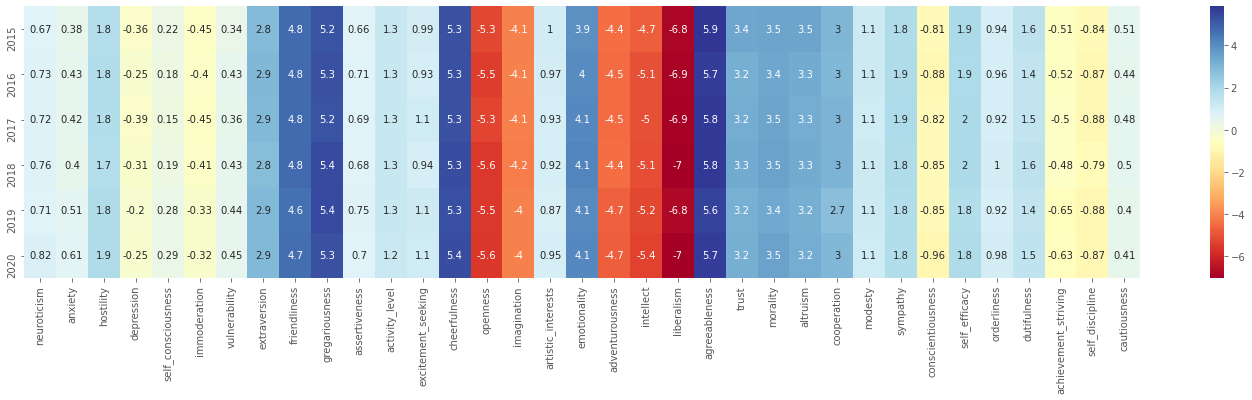

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(25,5))
sns.heatmap(overall_personality, ax=ax, annot=True, cmap='RdYlBu')

In [11]:
entrepreneur_2015_personality['year'] = '2015'
entrepreneur_2016_personality['year'] = '2016'
entrepreneur_2017_personality['year'] = '2017'
entrepreneur_2018_personality['year'] = '2018'
entrepreneur_2019_personality['year'] = '2019'
entrepreneur_2020_personality['year'] = '2020'
entrepreneur_artist_personality = pd.concat([entrepreneur_2015_personality, entrepreneur_2016_personality, entrepreneur_2017_personality, entrepreneur_2018_personality, entrepreneur_2019_personality, entrepreneur_2020_personality]).reset_index()

In [13]:
# for i, attr in enumerate(PERSONALITY_ATTRS):
#     sns.displot(entrepreneur_artist_personality, x=attr, hue='year', kind='kde')

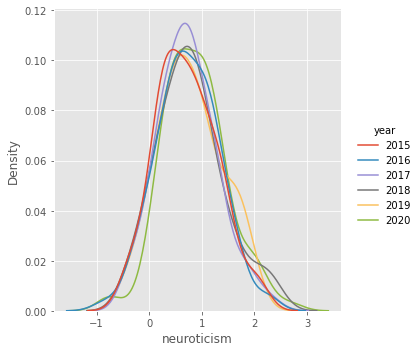

In [14]:
sns.displot(entrepreneur_artist_personality, x='neuroticism', hue='year', kind='kde')